In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['not_sold_6months'] = df['date'] < pd.to_datetime('2015-01-01')
print(df['not_sold_6months'].value_counts())

not_sold_6months
True     14633
False     6980
Name: count, dtype: int64


In [6]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
X = df[features]
y = df['not_sold_6months']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['not_sold_6months'] = y.values

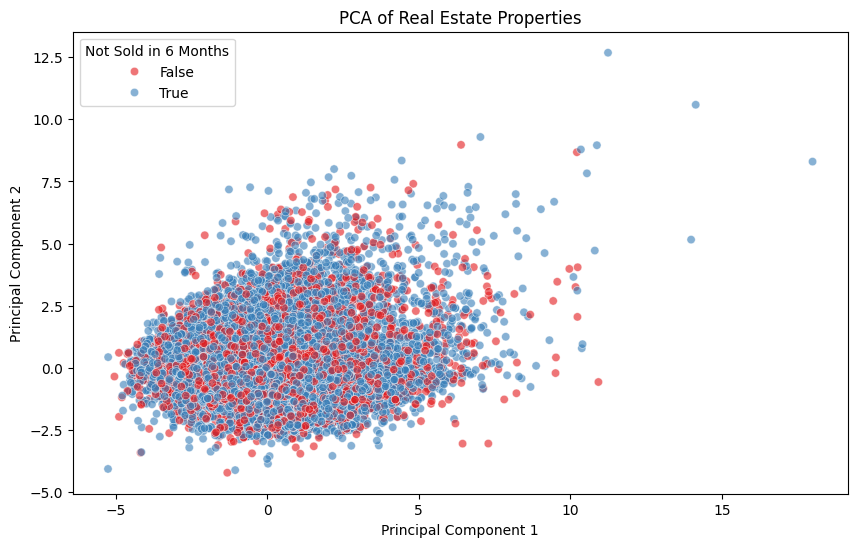

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='not_sold_6months', palette='Set1', alpha=0.6)
plt.title('PCA of Real Estate Properties')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Not Sold in 6 Months')
plt.show()

In [11]:
grouped = df.groupby('not_sold_6months')[features].mean().T
grouped['difference'] = grouped[True] - grouped[False]
grouped.sort_values('difference', ascending=False, inplace=True)
print("Feature differences between not sold and sold properties:\n", grouped)

Feature differences between not sold and sold properties:
 not_sold_6months         False          True  difference
sqft_living        2041.285100   2098.319073   57.033973
sqft_above         1759.827937   1802.015240   42.187303
yr_renovated         70.614900     90.978883   20.363984
sqft_basement       281.457163    296.303834   14.846670
grade                 7.605158      7.681542    0.076384
condition             3.366476      3.429919    0.063443
bathrooms             2.085100      2.128904    0.043804
floors                1.476862      1.502631    0.025769
bedrooms              3.357593      3.377161    0.019568
lat                  47.554192     47.562848    0.008656
waterfront            0.007020      0.007791    0.000771
long               -122.213841   -122.213923   -0.000081
view                  0.235817      0.233582   -0.002235
zipcode           98078.031948  98077.895852   -0.136097
yr_built           1971.154298   1970.933985   -0.220313
sqft_lot          15434.91719

In [12]:
print (pca.explained_variance_ratio_)

[0.28552314 0.1356099 ]
